In [113]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [114]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [115]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [116]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


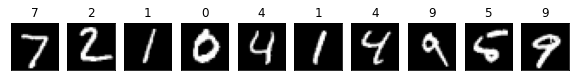

In [117]:
fig, axes = plt.subplots(ncols=10,sharey = True, sharex = True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [118]:
 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [119]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [120]:
model = Sequential([Flatten(input_shape=(28,28)),Dense(10, activation='sigmoid'),Dense(10, activation='softmax')])

In [121]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 10)                7850      
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

In [123]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2776 - acc: 0.6490 - val_loss: 0.8017 - val_acc: 0.7870
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7467 - acc: 0.7862 - val_loss: 0.6189 - val_acc: 0.8248
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6369 - acc: 0.8094 - val_loss: 0.5824 - val_acc: 0.8396
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5984 - acc: 0.8205 - val_loss: 0.5410 - val_acc: 0.8400
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5764 - acc: 0.8256 - val_loss: 0.5632 - val_acc: 0.8290
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5607 - acc: 0.8274 - val_loss: 0.5067 - val_acc: 0.8530
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5485 - acc: 0.8379 - val_loss: 0.5652 - val_acc: 0.8292
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

In [124]:
predictions = model.predict(X_test)
print(predictions.shape)

313/313 [==============================] - 0s 1ms/step
(10000, 10)


In [125]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


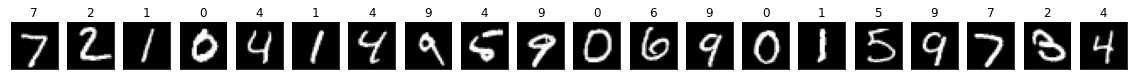

In [126]:
 
fig, axes = plt.subplots(ncols=20,figsize=(20, 4))
for i in range(0,20):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()